# FISH - Pipeline - A Python notebook to simulate FISH data

```
Author: Luis U. Aguilera
Contact Info: luis.aguilera@colostate.edu

Copyright (c) 2021 Munsky Group 
Colorado State University 
Licensed under BSD 3-Clause License.
```

### Libraries

In [1]:
# Importing libraries
import sys
import pathlib
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

### Path to source directories

In [2]:
# Defining directories
current_dir = pathlib.Path().absolute()
fa_dir = current_dir.parents[0].joinpath('src')
# Importing fish_analyses module
sys.path.append(str(fa_dir))
import fish_analyses as fa


In [7]:
# initializing Microscope simulation 
list_library_cells, dataframe_cell_library, background_pixels_library = fa.MicroscopeSimulation.initialize()

___

# Function to simulate cell positions

In [8]:
image_size_Y_X = [5000,5000]
number_of_cells_in_simulation = 100
simulation_dataframe,complete_image_size_Z_Y_X = fa.MicroscopeSimulation.generate_simulated_positions(image_size_Y_X,number_of_cells_in_simulation,list_library_cells,dataframe_cell_library)
simulation_dataframe.tail()

,start_y_position,start_x_position,centroid_y,centroid_x,z_size,y_size,x_size,nucleus_area,number_of_spots,ts_size_0,ts_size_1,ts_size_2,ts_size_3,library_id
95,2104,2425,2155,2459,27,103,69,5324,215,29,0,0,0,79
96,2481,1481,2524,1526,27,86,90,5945,443,0,0,0,0,62
97,4083,2453,4121,2492,27,77,79,4262,144,37,11,0,0,72
98,2984,280,3023,327,27,78,94,5369,286,88,0,0,0,45
99,4135,1653,4181,1703,27,92,100,7037,249,49,10,0,0,15


# Generate simulation on demand

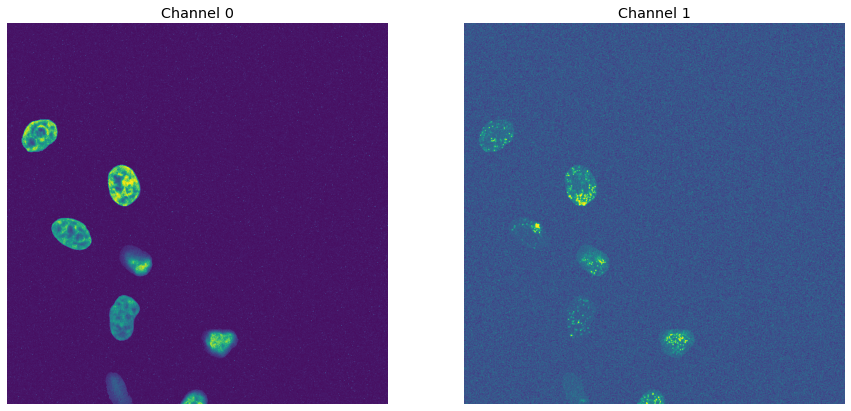

In [9]:
# Region to display
z_position = 0 #[-13:13]
y_position =  1200
x_position = 1200
x_size = 960
y_size = 960

simulated_image,dataframe_cells_in_image = fa.MicroscopeSimulation.make_simulated_image(z_position, y_position, x_position, x_size, y_size, complete_image_size_Z_Y_X, simulation_dataframe, list_library_cells, background_pixels_library)

# Plotting
number_color_channels = simulated_image.shape[2]
fig, ax = plt.subplots(1,number_color_channels, figsize=(15, 7))
# Plotting the heatmap of a section in the image
for i in range (number_color_channels):
    simulated_image_removed_extreme_values = fa.RemoveExtrema(simulated_image[:,:,i],min_percentile=0, max_percentile=99.9).remove_outliers()  #np.max(simulated_image[:,:,:,i],axis = 0)
    ax[i].imshow(simulated_image_removed_extreme_values);ax[i].set(title='Channel '+ str(i)); ax[i].axis('off');ax[i].grid(False)
plt.show()


In [10]:
dataframe_cells_in_image

,start_y_position,start_x_position,centroid_y,centroid_x,z_size,y_size,x_size,nucleus_area,number_of_spots,ts_size_0,ts_size_1,ts_size_2,ts_size_3,library_id
0,1942,1495,1999,1533,27,115,77,6456,99,0,0,0,0,38
1,1798,1524,1838,1565,27,80,83,4729,286,82,0,0,0,12
2,2006,1734,2044,1781,27,76,95,5166,305,52,0,0,0,1
3,1731,1362,1771,1412,27,81,101,5931,94,45,0,0,0,60
4,1609,1495,1661,1536,27,104,82,6568,424,63,0,0,0,56
5,1484,1282,1525,1327,27,82,90,5608,130,0,0,0,0,55


300 4665
300 2864


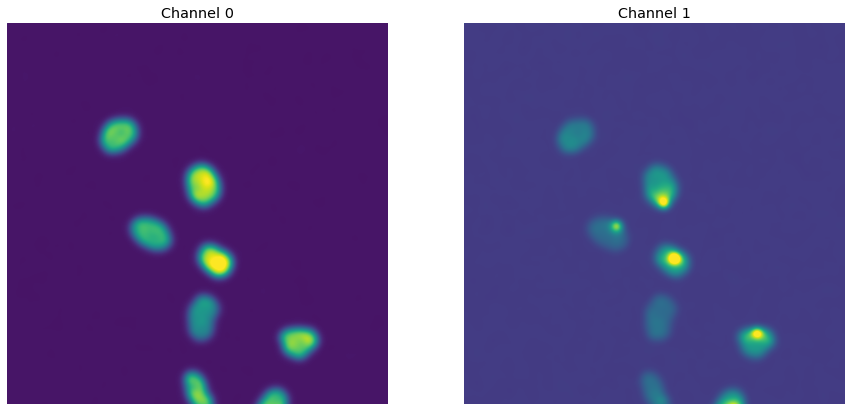

In [14]:
z_position = -14
y_position =  1200
x_position = 1000
x_size = 960
y_size = 960
simulated_image, dataframe_cells_in_image = fa.MicroscopeSimulation.make_simulated_image(z_position, y_position, x_position, x_size, y_size, complete_image_size_Z_Y_X, simulation_dataframe, list_library_cells, background_pixels_library)

# Plotting
number_color_channels = simulated_image.shape[2]
fig, ax = plt.subplots(1,number_color_channels, figsize=(15, 7))
# Plotting the heatmap of a section in the image
for i in range (number_color_channels):
    simulated_image_removed_extreme_values = fa.RemoveExtrema(simulated_image[:,:,i],min_percentile=0, max_percentile=99.9).remove_outliers()  #np.max(simulated_image[:,:,:,i],axis = 0)
    simulated_image_removed_extreme_values[0,0]=300
    simulated_image_removed_extreme_values[0,1]=2000
    ax[i].imshow(simulated_image_removed_extreme_values);ax[i].set(title='Channel '+ str(i)); ax[i].axis('off');ax[i].grid(False)
    print(np.min(simulated_image_removed_extreme_values),np.max(simulated_image_removed_extreme_values))
plt.show()


In [12]:
dataframe_cells_in_image

,start_y_position,start_x_position,centroid_y,centroid_x,z_size,y_size,x_size,nucleus_area,number_of_spots,ts_size_0,ts_size_1,ts_size_2,ts_size_3,library_id
0,1942,1495,1999,1533,27,115,77,6456,99,0,0,0,0,38
1,1798,1524,1838,1565,27,80,83,4729,286,82,0,0,0,12
2,2006,1734,2044,1781,27,76,95,5166,305,52,0,0,0,1
3,1731,1362,1771,1412,27,81,101,5931,94,45,0,0,0,60
4,1609,1495,1661,1536,27,104,82,6568,424,63,0,0,0,56
5,1484,1282,1525,1327,27,82,90,5608,130,0,0,0,0,55
